<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dots_filtered.zip', origin=_URL, extract=True)

!unzip ~/.keras/datasets/cats_and_dots_filtered.zip -d /content/

Archive:  /root/.keras/datasets/cats_and_dots_filtered.zip
replace /content/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import os
print(len(os.listdir('/content/cats_and_dogs_filtered/train/cats')), len(os.listdir('/content/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/content/cats_and_dogs_filtered/validation/cats')), len(os.listdir('/content/cats_and_dogs_filtered/validation/dogs')))

1000 1000
500 500


# Load and evalute VGG-19 on our dataset
## Prompt:
Let's go back a bit. I have this code so far -
cell 1:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dots_filtered.zip', origin=_URL, extract=True)

!unzip ~/.keras/datasets/cats_and_dots_filtered.zip -d /content/

cell 2:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

model = VGG19(weights='imagenet')

\# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

I want to take 8 random cat images and 8 random dog images, input them into the VGG model, and pick the highest probability prediction outputted from the model.
Then, I want you to plot all the images in a 4*4 grid, for each picture displaying the true class (cat/dog) and the VGG predicted class.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet')

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

print(len(model.layers))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!mkdir /content/cats_and_dogs_filtered/train/train_total
!mkdir /content/cats_and_dogs_filtered/validation/val_total

!cp /content/cats_and_dogs_filtered/train/cats/*.jpg /content/cats_and_dogs_filtered/train/train_total
!cp /content/cats_and_dogs_filtered/train/dogs/*.jpg /content/cats_and_dogs_filtered/train/train_total

!cp /content/cats_and_dogs_filtered/validation/dogs/*.jpg /content/cats_and_dogs_filtered/validation/val_total
!cp /content/cats_and_dogs_filtered/validation/cats/*.jpg /content/cats_and_dogs_filtered/validation/val_total

1/1 [==============================] - 0s 19ms/step
[[('n02100583', 'vizsla', 0.1635295), ('n02102318', 'cocker_spaniel', 0.15193877), ('n02112137', 'chow', 0.112826794), ('n02123159', 'tiger_cat', 0.07070823), ('n02099601', 'golden_retriever', 0.06670139)]]
1/1 [==============================] - 0s 20ms/step
[[('n04557648', 'water_bottle', 0.33933294), ('n02123597', 'Siamese_cat', 0.13751657), ('n03983396', 'pop_bottle', 0.10417603), ('n02110185', 'Siberian_husky', 0.07158924), ('n02091467', 'Norwegian_elkhound', 0.040793743)]]
1/1 [==============================] - 0s 25ms/step
[[('n02123394', 'Persian_cat', 0.22975571), ('n02123045', 'tabby', 0.15945552), ('n02124075', 'Egyptian_cat', 0.08217599), ('n02127052', 'lynx', 0.080716856), ('n02971356', 'carton', 0.05307432)]]
1/1 [==============================] - 0s 18ms/step
[[('n02105855', 'Shetland_sheepdog', 0.5066703), ('n02105641', 'Old_English_sheepdog', 0.09928977), ('n02110063', 'malamute', 0.09326743), ('n02110185', 'Siberian_h

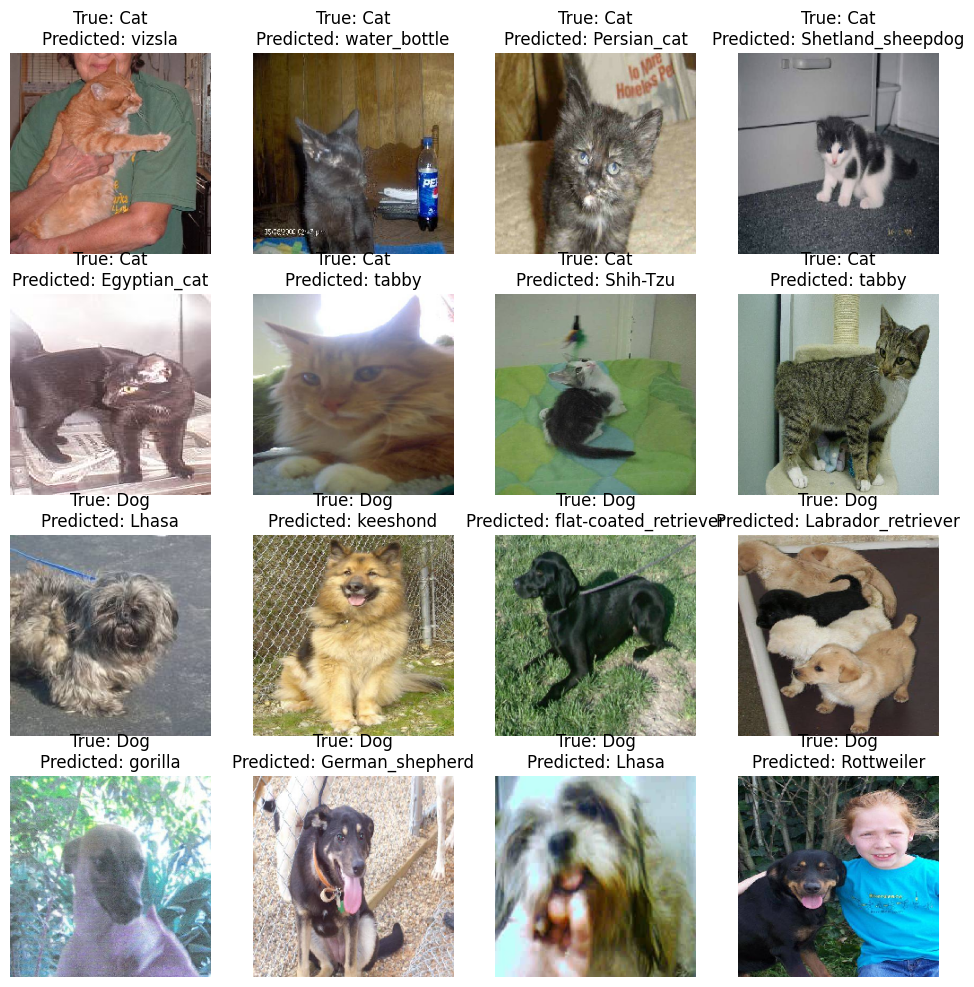

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg19 import decode_predictions, preprocess_input

# Path to the dataset
dataset_path = '/content/cats_and_dogs_filtered/validation'

# Get a list of cat and dog images
cat_images = [os.path.join(dataset_path, 'cats', img) for img in os.listdir(os.path.join(dataset_path, 'cats'))]
dog_images = [os.path.join(dataset_path, 'dogs', img) for img in os.listdir(os.path.join(dataset_path, 'dogs'))]

# Randomly select 8 cat and 8 dog images
selected_cat_images = random.sample(cat_images, 8)
selected_dog_images = random.sample(dog_images, 8)

# Function to preprocess an image for VGG model
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make predictions and get the top predicted class
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)
    top_prediction = decoded_predictions[0][0][1]
    return top_prediction

# Plotting images in a 4x4 grid
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_cat_images + selected_dog_images):
    plt.subplot(4, 4, i+1)
    true_class = os.path.split(os.path.split(img_path)[0])[1]
    true_class = "Cat" if true_class == "cats" else "Dog"
    predicted_class = predict_image(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
    plt.axis('off')

plt.show()

# Create label files for cats and dogs

In [4]:
import os
from tqdm import tqdm

# Set the path to the image folder
image_folder_path = ["/content/cats_and_dogs_filtered/train/cats", "/content/cats_and_dogs_filtered/validation/cats"]

# Set the path to the label folder
label_folder_path = ["/content/cats_and_dogs_filtered/train/cat_labels", "/content/cats_and_dogs_filtered/validation/cat_labels"]

# Ensure the label folder exists
for dir in label_folder_path:
    os.makedirs(dir, exist_ok=True)

counter = 0
for dir in tqdm(image_folder_path, desc="Labeling images..."):
    # List all image files in the folder
    image_files = os.listdir(dir)

    # Iterate through each image file
    for image_file in image_files:
        # Get the image file name without the extension
        image_name = os.path.splitext(image_file)[0]

        # Create the label file path
        label_file_path = os.path.join(label_folder_path[counter], f"{image_name}.txt")

        # Write the label (0) to the label file
        with open(label_file_path, 'w') as label_file:
            label_file.write("0")

    counter += 1

print("Label files created successfully.")

Labeling images...: 100%|██████████| 2/2 [00:00<00:00, 23.87it/s]

Label files created successfully.


# Create TF Dataset from directory

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to the training and validation data
train_cat_path = "/content/cats_and_dogs_filtered/train/cats"
train_dog_path = "/content/cats_and_dogs_filtered/train/dogs"
valid_cat_path = "/content/cats_and_dogs_filtered/validation/cats"
valid_dog_path = "/content/cats_and_dogs_filtered/validation/dogs"

train_cat_labels_path = "/content/cats_and_dogs_filtered/train/cat_labels"
train_dog_labels_path = "/content/cats_and_dogs_filtered/train/dog_labels"
valid_cat_labels_path = "/content/cats_and_dogs_filtered/validation/cat_labels"
valid_dog_labels_path = "/content/cats_and_dogs_filtered/validation/dog_labels"

# Create ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255)

# Create a function to load and preprocess the images and labels
def load_and_preprocess(image_path, label_path):
    # Load and preprocess image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))  # Adjust the size as needed
    img = tf.keras.applications.vgg16.preprocess_input(img)

    # Load label
    label = tf.io.read_file(label_path)
    label = tf.strings.to_number(label, out_type=tf.dtypes.int32)

    return img, label

# Load and preprocess images and labels for cats in training set
train_cat_ds = tf.data.Dataset.list_files(train_cat_path + '/*')
train_cat_labels_ds = tf.data.Dataset.list_files(train_cat_labels_path + '/*')
train_cat_ds = tf.data.Dataset.zip((train_cat_ds, train_cat_labels_ds))
train_cat_ds = train_cat_ds.map(lambda x, y: load_and_preprocess(x, y))

# Load and preprocess images and labels for dogs in training set
train_dog_ds = tf.data.Dataset.list_files(train_dog_path + '/*')
train_dog_labels_ds = tf.data.Dataset.list_files(train_dog_labels_path + '/*')
train_dog_ds = tf.data.Dataset.zip((train_dog_ds, train_dog_labels_ds))
train_dog_ds = train_dog_ds.map(lambda x, y: load_and_preprocess(x, y))

# Load and preprocess images and labels for cats in validation set
valid_cat_ds = tf.data.Dataset.list_files(valid_cat_path + '/*')
valid_cat_labels_ds = tf.data.Dataset.list_files(valid_cat_labels_path + '/*')
valid_cat_ds = tf.data.Dataset.zip((valid_cat_ds, valid_cat_labels_ds))
valid_cat_ds = valid_cat_ds.map(lambda x, y: load_and_preprocess(x, y))

# Load and preprocess images and labels for dogs in validation set
valid_dog_ds = tf.data.Dataset.list_files(valid_dog_path + '/*')
valid_dog_labels_ds = tf.data.Dataset.list_files(valid_dog_labels_path + '/*')
valid_dog_ds = tf.data.Dataset.zip((valid_dog_ds, valid_dog_labels_ds))
valid_dog_ds = valid_dog_ds.map(lambda x, y: load_and_preprocess(x, y))

# Combine cat and dog datasets for training and validation sets
train_ds = train_cat_ds.concatenate(train_dog_ds)
valid_ds = valid_cat_ds.concatenate(valid_dog_ds)

# Freeze all model layers up the the final Conv2D layer, and reshape the output layer to have 2 neurons instead of 1000

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers up to the final Conv2D layer
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Add custom dense layers for classification
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the new model
model.summary()
print(len(model.layers))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Making sure the remainig trainable layers are the ones intended

In [ ]:
for layer in model.layers:
    if layer.trainable == True:
        print(layer)

## Train the model

In [ ]:
# Shuffle and batch the datasets
BATCH_SIZE = 32
train_ds = train_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Train the fine-tuned model
epochs = 10  # Adjust as needed
history = model.fit(train_ds, epochs=epochs, validation_data=valid_ds)

# Display the accuracy of the trained model
accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Training Accuracy: {accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/10
63/63 [==============================] - 41s 413ms/step - loss: 2.2942 - accuracy: 0.8835 - val_loss: 0.0986 - val_accuracy: 0.9820
Epoch 2/10
63/63 [==============================] - 19s 260ms/step - loss: 0.0529 - accuracy: 0.9895 - val_loss: 0.0819 - val_accuracy: 0.9820
Epoch 3/10
63/63 [==============================] - 19s 232ms/step - loss: 4.9794e-04 - accuracy: 0.9995 - val_loss: 0.0821 - val_accuracy: 0.9810
Epoch 4/10
63/63 [==============================] - 17s 226ms/step - loss: 2.1694e-05 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9820
Epoch 5/10
63/63 [==============================] - 19s 229ms/step - loss: 1.2351e-05 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9820
Epoch 6/10
63/63 [==============================] - 18s 237ms/step - loss: 9.5629e-06 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9830
Epoch 7/10
63/63 [==============================] - 19s 237ms/step - loss: 7.8153e-06 - accuracy: 1.0000 - val_loss: 0.0806 - 

# Run a sample test through the model
## Prompt:
Ok perfect, I have trained my model and it's saved in the variable 'model'.
I now want to take a sample of 10 random images from this path - /content/cats_and_dogs_filtered/validation/cats and 10 more random images from this path - /content/cats_and_dogs_filtered/validation/dogs.
For all the random images, I want to run them through the model and get the predicted class. Then, I want to plot all 20 images in a 4*5 grid, displaying every image and the class it was predicted to be.

1/1 [==============================] - 0s 27ms/step


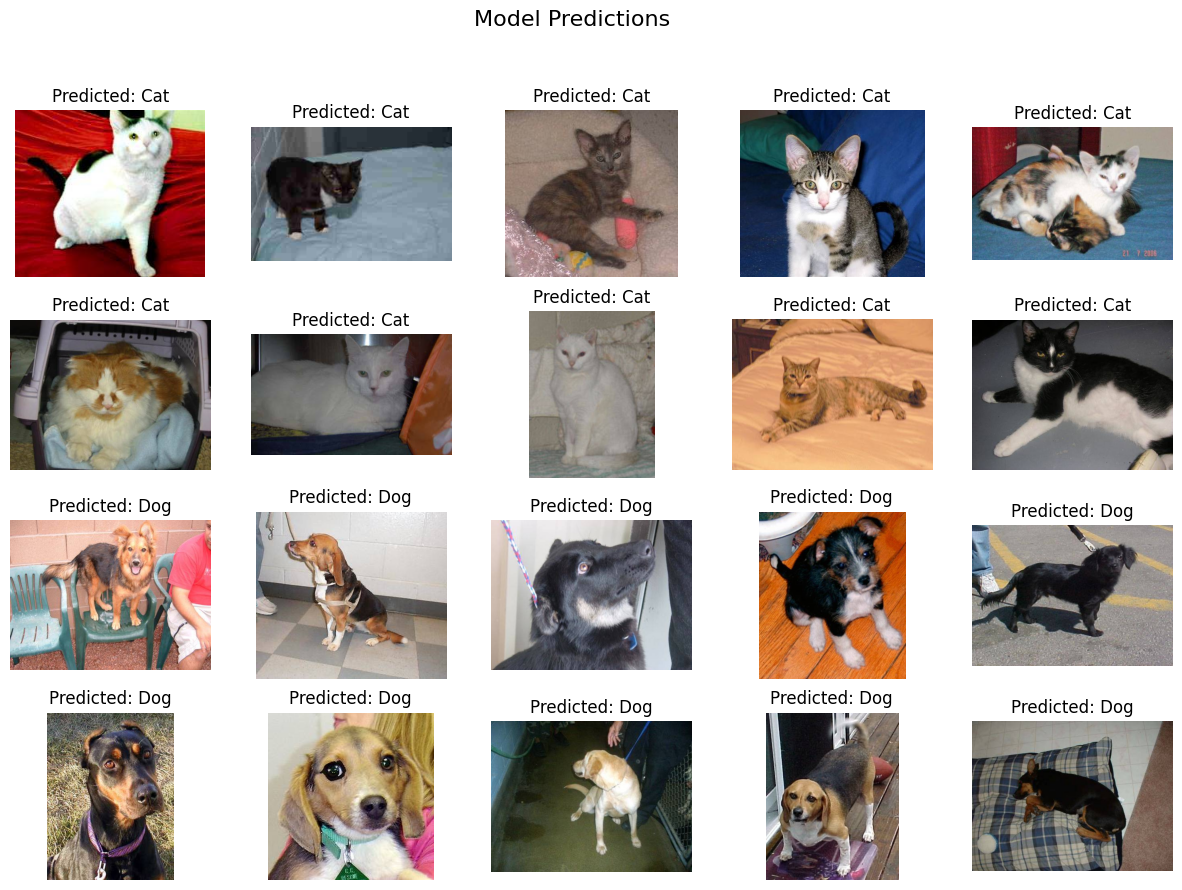

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# Load your trained model if necessary
# model = load_model('path/to/your/model')

# Directory paths for cat and dog validation images
cats_path = '/content/cats_and_dogs_filtered/validation/cats'
dogs_path = '/content/cats_and_dogs_filtered/validation/dogs'

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make predictions and plot images
def plot_images_with_predictions(image_paths, title):
    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=16)

    for i, img_path in enumerate(image_paths, 1):
        img_array = load_and_preprocess_image(img_path)
        prediction = model.predict(img_array)
        predicted_class = "Dog" if prediction[0][0] < 0.5 else "Cat"

        plt.subplot(4, 5, i)
        plt.imshow(image.load_img(img_path))
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')

# Randomly select 10 cat and 10 dog images
cat_images = random.sample(os.listdir(cats_path), 10)
dog_images = random.sample(os.listdir(dogs_path), 10)

# Create full file paths
cat_image_paths = [os.path.join(cats_path, img) for img in cat_images]
dog_image_paths = [os.path.join(dogs_path, img) for img in dog_images]

# Plot images with predictions
plot_images_with_predictions(cat_image_paths + dog_image_paths, title='Model Predictions')
plt.show()

# Save model compatible for Keras

In [ ]:
# from tensorflow.keras.models import load_model

# Load your trained model if necessary
# keras_model = load_model('path/to/your/model')

# Save the model in Keras format (HDF5)
model.save('/content/cats_and_dogs_filtered/keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Recreating the experiment using PyTorch library

## Loading model
### Prompt:
Today you're my software development assistant.
We are doing some AI coding and fine-tuning the VGG16 model.
We are working in Google Colab, writing in Python, and storing our data in Google Drive (which we access through Colab).

We will be using the PyTorch library for our AI coding.
First off, is it possible to download and load a pre-trained model on PyTorch? If so please provide a script to get and load the model with PyTorch

In [3]:
import torch
import torchvision.models as models

# Download the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Print the model architecture
print(vgg16)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Test the model on sample
### Prompt:
Great.
We are using the cats_and_dogs_filtered dataset. I have some cat pictures over at - /content/cats_and_dogs_filtered/train/cats, and some dog pictures at - /content/cats_and_dogs_filtered/train/dogs.

I would like to grab a sample of 8 images from each folder, run all 16 images through our vgg16 model, get their highest probability prediction, and plot all 16 images in a 4*4 grid, displaying each image and it's true and predicted classes

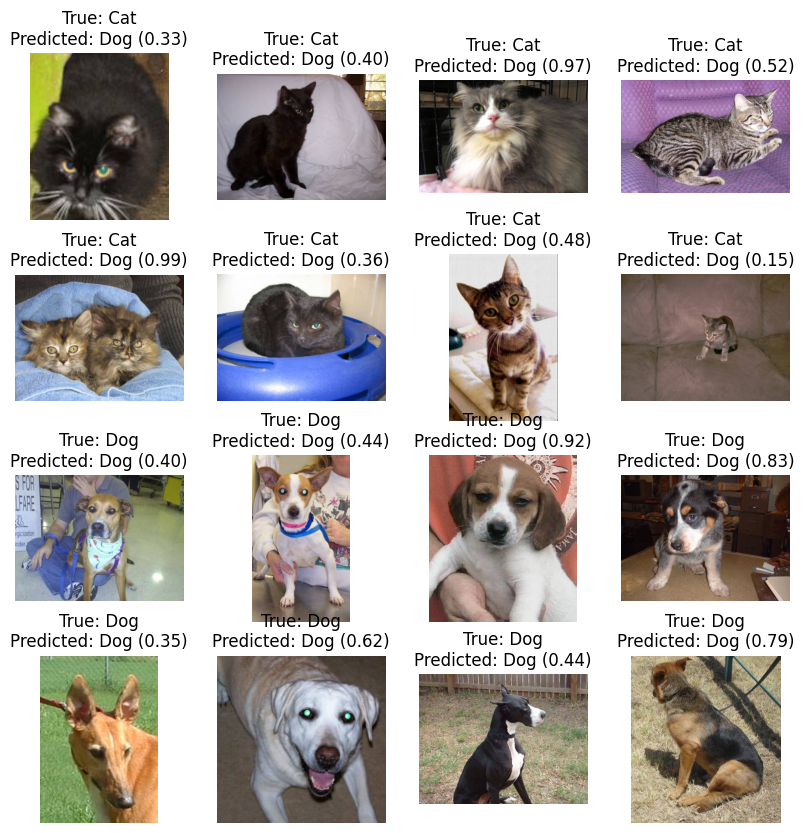

In [4]:
import torch
from torchvision import transforms
from torch.autograd import Variable
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Set the model to evaluation mode
vgg16.eval()

# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Function to preprocess an image and make a prediction
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    image = Variable(image.unsqueeze(0))

    # Make the prediction
    with torch.no_grad():
        output = vgg16(image)
        _, predicted_class = torch.max(output, 1)
        probability = torch.nn.functional.softmax(output, dim=1)[0][predicted_class].item()

    return predicted_class.item(), probability

# Paths to the cat and dog image folders
cat_folder = "/content/cats_and_dogs_filtered/train/cats"
dog_folder = "/content/cats_and_dogs_filtered/train/dogs"

# Get 8 cat and 8 dog images
cat_images = [f"{cat_folder}/{img}" for img in os.listdir(cat_folder)[:8]]
dog_images = [f"{dog_folder}/{img}" for img in os.listdir(dog_folder)[:8]]
all_images = cat_images + dog_images

# Function to display images in a 4x4 grid
def show_images(images, true_labels, predicted_labels, probabilities):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        img = Image.open(images[i]).convert("RGB")
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]} ({probabilities[i]:.2f})")

    plt.show()

# Make predictions for all images
true_labels = ["Cat"] * 8 + ["Dog"] * 8
predicted_labels = []
probabilities = []

for img_path in all_images:
    predicted_class, probability = predict_image(img_path)
    predicted_labels.append("Cat" if predicted_class == 0 else "Dog")
    probabilities.append(probability)

# Display the results
show_images(all_images, true_labels, predicted_labels, probabilities)

## Freezing layers and modifying output layer
### Prompt:
Great.
Now we are looking to perform some transfer learning, and we will be modifying some of our layers.
First off, I need you to freeze all the model layers, up to the final Conv2D layer, and all the layers onwards. The first un-frozen layer should be the following layer -
(28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
which is found in VGG(
  (features): Sequential(

After you froze the needed layers, keep the un-frozen layers the same. The only layer we will change is the output layer - make sure it has 2 neurons as we are going to be classifying from 2 distinct classes. Also make sure that after this output layer, we have a softmax activation function.

In [13]:
import torch.nn as nn

# Load the VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Freeze layers up to the specified point
freeze_layers = True
unfreeze_from_layer = "features.28"  # Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

for name, param in vgg16.named_parameters():
    if freeze_layers and unfreeze_from_layer not in name:
        param.requires_grad = False
    else:
        freeze_layers = False  # Unfreeze layers starting from the specified layer

# Modify the output layer for binary classification
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 2)  # Output layer with 2 neurons for binary classification

# Add softmax activation function
vgg16.classifier.add_module("7", nn.Softmax(dim=1))

# Print the modified model architecture
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Rearranging directories for easy dataset creation...

In [12]:
!mkdir /content/cats_and_dogs_filtered/labels
!mkdir /content/cats_and_dogs_filtered/labels/train/
!mkdir /content/cats_and_dogs_filtered/labels/validation/

!mv /content/cats_and_dogs_filtered/train/cat_labels /content/cats_and_dogs_filtered/labels/train/
!mv /content/cats_and_dogs_filtered/train/dog_labels /content/cats_and_dogs_filtered/labels/train/
!mv /content/cats_and_dogs_filtered/validation/cat_labels /content/cats_and_dogs_filtered/labels/validation/
!mv /content/cats_and_dogs_filtered/validation/dog_labels /content/cats_and_dogs_filtered/labels/validation/

## Creating dataset
### Prompt:
Great. Now let's work on our dataset.
We have a dataset of pictures of cats and dogs. We will be labeling our classes as '0' for cats and '1' for dogs.
These are the paths for our training images and labels -
/content/cats_and_dogs_filtered/train/cats, /content/cats_and_dogs_filtered/train/cat_labels, /content/cats_and_dogs_filtered/train/dogs, /content/cats_and_dogs_filtered/train/dog_labels
And these are the paths for our validation images and labels -
/content/cats_and_dogs_filtered/validation/cats, /content/cats_and_dogs_filtered/validation/cat_labels, /content/cats_and_dogs_filtered/validation/dogs, /content/cats_and_dogs_filtered/validation/dog_labels

I need you to take all the images and labels from these paths, and create a train_dataset and val_dataset, which will be used to train our model and make the transfer learning.

Make sure the dataset you make is compatible and easy to use with PyTorch.

In [11]:
from torchvision import datasets, transforms

# Define the paths to the train and validation datasets
train_data_path = "/content/cats_and_dogs_filtered/train"
val_data_path = "/content/cats_and_dogs_filtered/validation"

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match VGG16 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# Create train and validation datasets
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
val_dataset = datasets.ImageFolder(root=val_data_path, transform=transform)

# Print the class-to-index mapping
print("Class-to-index mapping:")
print(train_dataset.class_to_idx)

# Print the number of samples in each dataset
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")

Class-to-index mapping:
{'cats': 0, 'dogs': 1}
Number of training samples: 2000
Number of validation samples: 1000


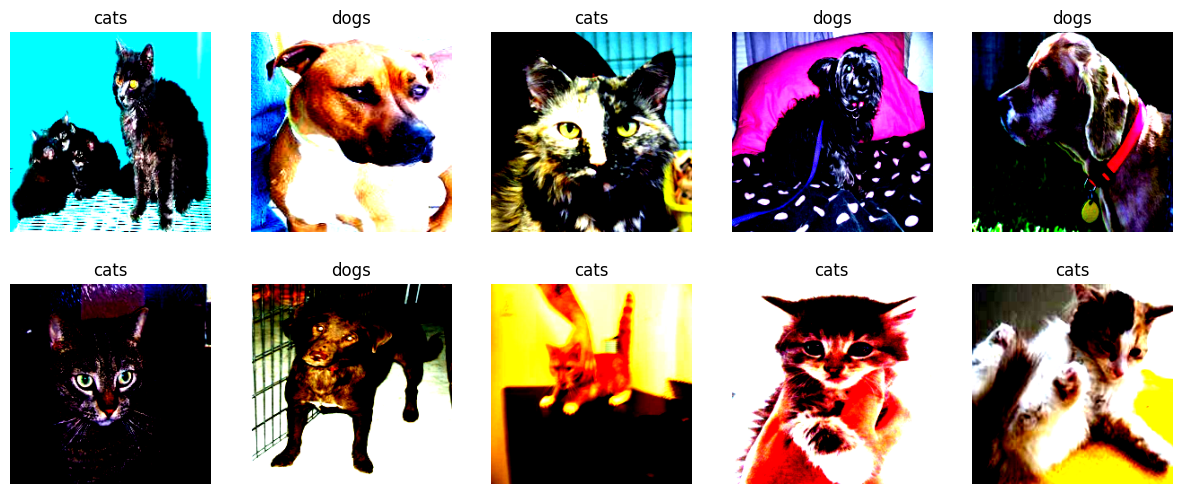

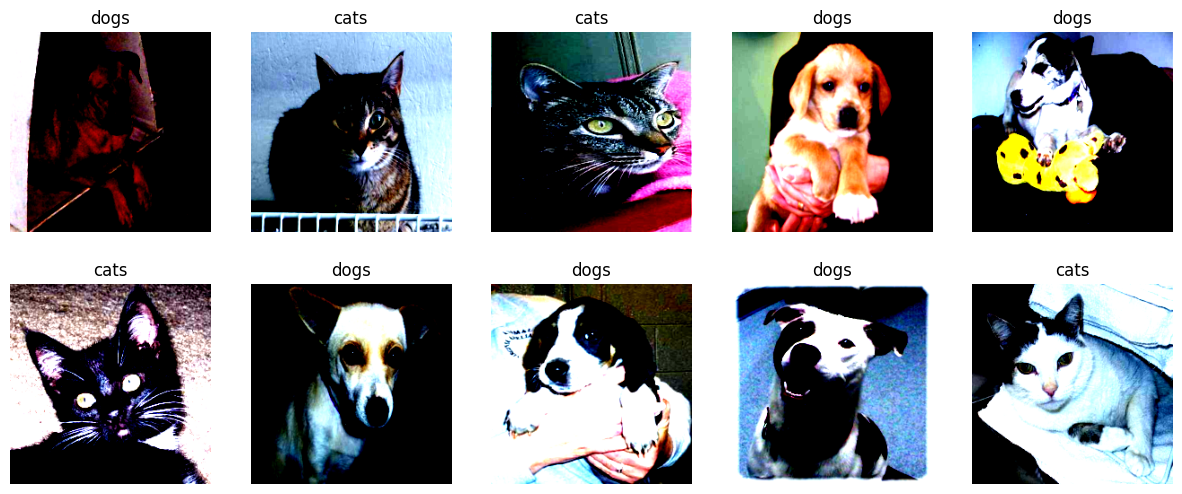

In [12]:
# Sample 10 cat and 10 dog images
cat_indices = [index for index, label in enumerate(train_dataset.targets) if label == 0][:10]
dog_indices = [index for index, label in enumerate(train_dataset.targets) if label == 1][:10]
sample_indices = cat_indices + dog_indices

# Create a DataLoader for the sampled images
sampled_dataset = torch.utils.data.Subset(train_dataset, sample_indices)
sample_loader = DataLoader(sampled_dataset, batch_size=10, shuffle=True)

# Map class index to class name
class_names = train_dataset.classes

# Display the sampled images and labels
for images, labels in sample_loader:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i, ax in enumerate(axes.flat):
        img = images[i].numpy().transpose((1, 2, 0))
        img = np.clip(img, 0, 1)  # Clip to valid range [0, 1]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(class_names[labels[i]])

    plt.show()

## Setting up training loop
# Prompt:
Great. Now I want to use the train_dataset and validation_dataset we just created to train our model. Make sure our loss function is sparse-categorical-crossentropy, Adam optimizer with learning rate of 0.001. Our metric is accuracy.
At the end of training, make sure to output our training and validation accuracy

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
from torchvision import transforms
from torch.optim.lr_scheduler import StepLR

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Set up loss function, optimizer, and metric
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.0001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Adjust the step_size and gamma

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)

# Train the model
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    # Training
    vgg16.train()
    total_train_correct = 0
    total_train_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        _, predicted = torch.max(outputs, 1)
        total_train_samples += labels.size(0)
        total_train_correct += (predicted == labels).sum().item()

    train_accuracy = total_train_correct / total_train_samples

    # Validation
    vgg16.eval()
    total_val_correct = 0
    total_val_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = vgg16(inputs)
            _, predicted = torch.max(outputs, 1)
            total_val_samples += labels.size(0)
            total_val_correct += (predicted == labels).sum().item()

    val_accuracy = total_val_correct / total_val_samples

    # Print training and validation accuracy
    print(f"Epoch {epoch + 1}/{num_epochs} => Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Print final training and validation accuracy
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/10 => Training Accuracy: 0.9420, Validation Accuracy: 0.9770
Epoch 2/10 => Training Accuracy: 0.9625, Validation Accuracy: 0.9770
Epoch 3/10 => Training Accuracy: 0.9585, Validation Accuracy: 0.9770
Epoch 4/10 => Training Accuracy: 0.9585, Validation Accuracy: 0.9770
Epoch 5/10 => Training Accuracy: 0.9625, Validation Accuracy: 0.9770
Epoch 6/10 => Training Accuracy: 0.9595, Validation Accuracy: 0.9770
Epoch 7/10 => Training Accuracy: 0.9665, Validation Accuracy: 0.9770
Epoch 8/10 => Training Accuracy: 0.9640, Validation Accuracy: 0.9770
Epoch 9/10 => Training Accuracy: 0.9610, Validation Accuracy: 0.9770
Epoch 10/10 => Training Accuracy: 0.9620, Validation Accuracy: 0.9770
Final Training Accuracy: 0.9620
Final Validation Accuracy: 0.9770


## Run sample through model
### Prompt:
Good. I've completed the training, and achieved good accuracy results.

All is left to do is run a sample of 8 cats and 8 dogs through our network, and plot the images together with the true and predicted labels

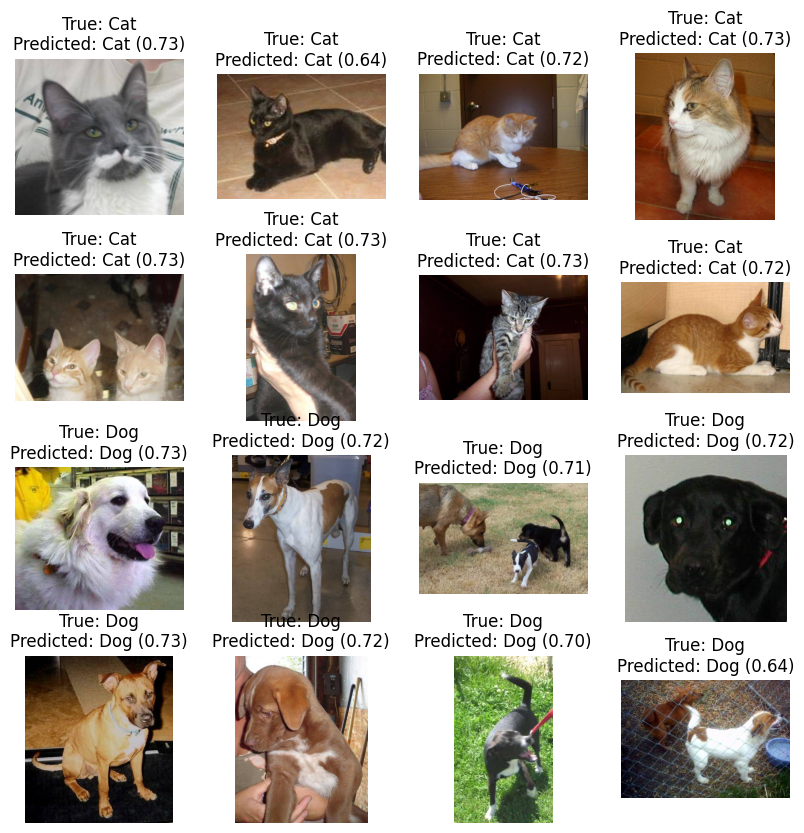

In [19]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import models, datasets
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming vgg16 is your trained model

# Set the model to evaluation mode
vgg16.eval()

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# Paths to the cat and dog image folders
cat_folder = "/content/cats_and_dogs_filtered/validation/cats"
dog_folder = "/content/cats_and_dogs_filtered/validation/dogs"

# Get 8 cat and 8 dog images
cat_images = [f"{cat_folder}/{img}" for img in os.listdir(cat_folder)[100:108]]
dog_images = [f"{dog_folder}/{img}" for img in os.listdir(dog_folder)[100:108]]
all_images = cat_images + dog_images

# Function to preprocess an image and make a prediction
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Move the input to the device (GPU if available)
    image = image.to(device)

    # Make the prediction
    with torch.no_grad():
        output = vgg16(image)
        _, predicted_class = torch.max(output, 1)
        probability = torch.nn.functional.softmax(output, dim=1)[0][predicted_class].item()

    return predicted_class.item(), probability

# Function to display images in a 4x4 grid
def show_images(images, true_labels, predicted_labels, probabilities):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        img = Image.open(images[i]).convert("RGB")
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]} ({probabilities[i]:.2f})")

    plt.show()

# Get true labels
true_labels = ["Cat"] * 8 + ["Dog"] * 8

# Make predictions for all images
predicted_labels = []
probabilities = []

for img_path in all_images:
    predicted_class, probability = predict_image(img_path)
    predicted_labels.append("Cat" if predicted_class == 0 else "Dog")
    probabilities.append(probability)

# Display the results
show_images(all_images, true_labels, predicted_labels, probabilities)